Import all libraries

In [143]:
import numpy as np
import matplotlib.pyplot as plt

from Decision_Tree import DecisionTree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse

Generate the dataset (300x1) x 3 Classes

In [144]:
fst_class = 300
snd_class = 300
X_1 = np.c_[(np.full(fst_class, 1) + np.random.randn(fst_class),
            np.full(fst_class, 1) + np.random.randn(fst_class))]

X_2 = np.c_[(np.full(snd_class, 3) + np.random.randn(snd_class),
            np.full(snd_class, 3) + np.random.randn(snd_class))]

Y_1 = np.full(fst_class, 0)
Y_2 = np.full(snd_class, 1)

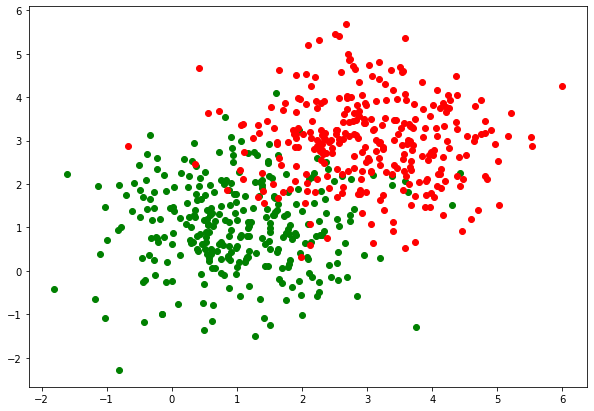

In [145]:
plt.figure(figsize=(10, 7))
plt.scatter(X_1[:, 0], X_1[:, 1], marker='o', c='g')
plt.scatter(X_2[:, 0], X_2[:, 1], marker='o', c='r')
plt.show()

Preprocess and shuffle data:

In [146]:
a = np.vstack((X_1, X_2))
b = np.hstack((Y_1, Y_2))
all = np.hstack((a, b.reshape(a.shape[0], 1)))
np.random.shuffle(all)

X = all[:, :2]
Y = all[:, 2]

Split in train and test:

In [147]:
from sklearn import preprocessing

X_train, X_test, Y_train, Y_test_ = train_test_split(X, Y, train_size=0.7)

X_train = X_train.reshape(X_train.shape[0], 2)
Y_train = Y_train.reshape(Y_train.shape[0], 1)
X_test = X_test.reshape(X_test.shape[0], 2)
Y_test = Y_test_.reshape(Y_test_.shape[0], 1)


Create, configure and train the model

In [148]:
dt = DecisionTree()
dt.fit(X_train, Y_train)
dt.train(3)
print("Finish")

Finish


In [149]:
sk_dt = DecisionTreeClassifier(max_depth=3)
sk_dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

Check metrics:

In [150]:
my_predictions = dt.predict_many(X_test)
sk_predictions = sk_dt.predict(X_test)
print(f"My MSE: {mse(preprocessing.minmax_scale(my_predictions), Y_test_)}")
print(f"Sklearn MSE: {mse(preprocessing.minmax_scale(sk_predictions), Y_test_)}")

My MSE: 0.09718434281046509
Sklearn MSE: 0.1388888888888889


Visualization

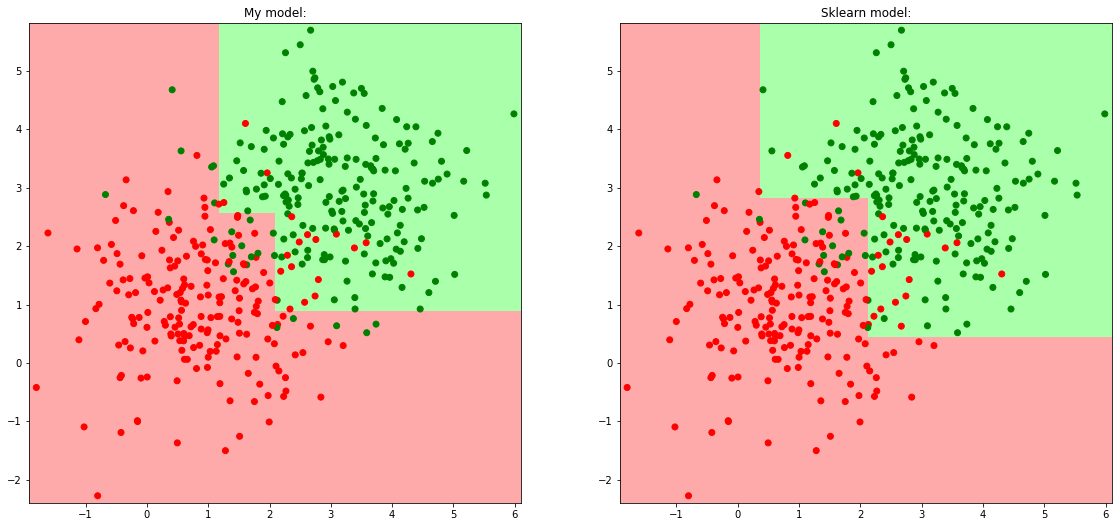

In [151]:

from matplotlib.colors import ListedColormap

colors = ("red", "green")
colored_y = np.zeros(Y_train.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[Y_train.reshape((Y_train.shape[0],)) == cl] = str(colors[i])



plt.figure(figsize=(30, 30))

my = plt.subplot2grid((3, 3), (0, 0), title="My model:")
sk = plt.subplot2grid((3, 3), (0, 1), title="Sklearn model:")


eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_train[:, 0]) - eps, np.max(X_train[:, 0]) + eps, 200),
                     np.linspace(np.min(X_train[:, 1]) - eps, np.max(X_train[:, 1]) + eps, 200))
Z_my = dt.predict_many(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_sk = sk_dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
my.pcolormesh(xx, yy, Z_my, cmap=cmap_light)
sk.pcolormesh(xx, yy, Z_sk, cmap=cmap_light)

my.scatter(X_train[:, 0], X_train[:, 1], c=colored_y)
sk.scatter(X_train[:, 0], X_train[:, 1], c=colored_y)
pass